In [1]:
import json
import re

import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 효과_naver_news_1000.json'
    
f = open(openFileName, 'r', encoding='utf-8').read()

jsonData = json.loads(f)
data = ''

for item in jsonData:
    if 'description' in item.keys():
        data = data + re.sub(r'[^\w]', ' ', item['description']) + ' '

In [3]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(data)

In [4]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [5]:
print(X)

  (0, 1489)	1
  (1, 2086)	1
  (2, 272)	1
  (3, 1689)	1
  (4, 321)	1
  (5, 1222)	1
  (6, 2040)	1
  (7, 1683)	1
  (8, 455)	1
  (9, 2367)	1
  (10, 291)	1
  (11, 197)	1
  (12, 2025)	1
  (13, 2233)	1
  (14, 455)	1
  (15, 486)	1
  (16, 1765)	1
  (17, 506)	1
  (18, 1722)	1
  (19, 197)	1
  (20, 893)	1
  (21, 1674)	1
  (22, 2346)	1
  (23, 1668)	1
  (24, 2362)	1
  :	:
  (21213, 529)	1
  (21214, 1461)	1
  (21215, 272)	1
  (21216, 1689)	1
  (21217, 2319)	1
  (21218, 1340)	1
  (21219, 529)	1
  (21220, 459)	1
  (21221, 462)	1
  (21222, 2319)	1
  (21223, 1340)	1
  (21224, 2346)	1
  (21225, 506)	1
  (21226, 1775)	1
  (21227, 272)	1
  (21228, 1689)	1
  (21229, 459)	1
  (21230, 948)	1
  (21231, 2319)	1
  (21232, 1340)	1
  (21233, 529)	1
  (21234, 1461)	1
  (21235, 983)	1
  (21236, 272)	1
  (21237, 1689)	1


In [6]:
print(vectorize.vocabulary_)

{'이번': 1489, '통해': 2086, '궐련': 272, '전자담배': 1689, '기기': 321, '아이': 1222, '코스': 2040, '전용': 1683, '담배': 455, '히츠': 2367, '근간': 291, '과학': 197, '커뮤니케이션': 2025, '합류': 2233, '대안': 486, '제품': 1765, '대한': 506, '정보': 1722, '분야': 893, '전문가': 1674, '효과': 2346, '전달': 1668, '흡연': 2362, '인식': 1539, '매출': 645, '증가': 1845, '진동': 1891, '모터': 684, '공급': 170, '물량': 718, '영향': 1336, '엠게임': 1291, '지난해': 1864, '업계': 1275, '글로벌': 297, '기업': 332, '사업': 931, '기대': 324, '국내': 251, '점유': 1708, '상승': 967, '전망': 1670, '기저': 340, '수익': 1099, '개선': 71, '기준': 344, '불과': 896, '하반기': 2203, '음료': 1456, '장주': 1632, '메가스터디': 656, '교육': 222, '영업': 1334, '이익': 1508, '기록': 326, '예정': 1346, '트래픽': 2095, '회복': 2341, '미세먼지': 736, '피해': 2188, '극복': 288, '위해': 1421, '배달': 801, '기요': 334, '입점': 1587, '편의점': 2133, '상품': 977, '서비스': 999, '시작': 1150, '행시': 2253, '점주': 1709, '서울': 1001, '전역': 1682, '확산': 2326, '본사': 863, '수수료': 1091, '증대': 1851, '전자': 1688, '필립모리스': 2193, '코리아': 2039, '대표': 499, '정일우': 1733, '해외': 2247, '수출': 1104, 

In [7]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'이번': 37,
 '통해': 25,
 '궐련': 615,
 '전자담배': 1254,
 '기기': 23,
 '아이': 80,
 '코스': 79,
 '전용': 4,
 '담배': 566,
 '히츠': 2,
 '근간': 1,
 '과학': 5,
 '커뮤니케이션': 12,
 '합류': 1,
 '대안': 3,
 '제품': 170,
 '대한': 113,
 '정보': 14,
 '분야': 2,
 '전문가': 6,
 '효과': 1018,
 '전달': 82,
 '흡연': 235,
 '인식': 10,
 '매출': 80,
 '증가': 101,
 '진동': 3,
 '모터': 3,
 '공급': 6,
 '물량': 5,
 '영향': 36,
 '엠게임': 1,
 '지난해': 90,
 '업계': 17,
 '글로벌': 22,
 '기업': 7,
 '사업': 43,
 '기대': 71,
 '국내': 98,
 '점유': 70,
 '상승': 60,
 '전망': 51,
 '기저': 66,
 '수익': 59,
 '개선': 97,
 '기준': 25,
 '불과': 3,
 '하반기': 13,
 '음료': 7,
 '장주': 4,
 '메가스터디': 3,
 '교육': 22,
 '영업': 34,
 '이익': 43,
 '기록': 18,
 '예정': 30,
 '트래픽': 30,
 '회복': 49,
 '미세먼지': 25,
 '피해': 25,
 '극복': 23,
 '위해': 103,
 '배달': 62,
 '기요': 20,
 '입점': 20,
 '편의점': 57,
 '상품': 38,
 '서비스': 43,
 '시작': 46,
 '행시': 20,
 '점주': 21,
 '서울': 35,
 '전역': 21,
 '확산': 54,
 '본사': 21,
 '수수료': 20,
 '증대': 25,
 '전자': 157,
 '필립모리스': 31,
 '코리아': 9,
 '대표': 13,
 '정일우': 4,
 '해외': 10,
 '수출': 45,
 '성장': 45,
 '달성': 1,
 '대비': 80,
 '역대': 6,
 '감사원': 1,
 '금연':

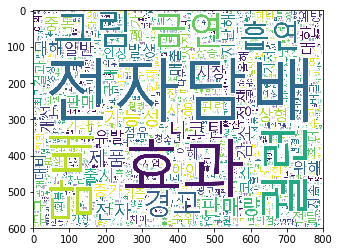

In [10]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [11]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'이번': 1489, '통해': 2086, '궐련': 272, '전자담배': 1689, '기기': 321, '아이': 1222, '코스': 2040, '전용': 1683, '담배': 455, '히츠': 2367, '근간': 291, '과학': 197, '커뮤니케이션': 2025, '합류': 2233, '대안': 486, '제품': 1765, '대한': 506, '정보': 1722, '분야': 893, '전문가': 1674, '효과': 2346, '전달': 1668, '흡연': 2362, '인식': 1539, '매출': 645, '증가': 1845, '진동': 1891, '모터': 684, '공급': 170, '물량': 718, '영향': 1336, '엠게임': 1291, '지난해': 1864, '업계': 1275, '글로벌': 297, '기업': 332, '사업': 931, '기대': 324, '국내': 251, '점유': 1708, '상승': 967, '전망': 1670, '기저': 340, '수익': 1099, '개선': 71, '기준': 344, '불과': 896, '하반기': 2203, '음료': 1456, '장주': 1632, '메가스터디': 656, '교육': 222, '영업': 1334, '이익': 1508, '기록': 326, '예정': 1346, '트래픽': 2095, '회복': 2341, '미세먼지': 736, '피해': 2188, '극복': 288, '위해': 1421, '배달': 801, '기요': 334, '입점': 1587, '편의점': 2133, '상품': 977, '서비스': 999, '시작': 1150, '행시': 2253, '점주': 1709, '서울': 1001, '전역': 1682, '확산': 2326, '본사': 863, '수수료': 1091, '증대': 1851, '전자': 1688, '필립모리스': 2193, '코리아': 2039, '대표': 499, '정일우': 1733, '해외': 2247, '수출': 1104, 

In [12]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('전자담배', 1254.0)
('효과', 1018.0)
('궐련', 615.0)
('담배', 566.0)
('그림', 425.0)
('금연', 361.0)
('흡연', 235.0)
('경고', 221.0)
('판매량', 188.0)
('제품', 170.0)
('가능성', 168.0)
('니코틴', 163.0)
('전자', 157.0)
('감소', 132.0)
('정책', 128.0)
('출시', 119.0)
('중독', 119.0)
('대한', 113.0)
('일반', 113.0)
('상형', 111.0)
('유발', 108.0)
('위해', 103.0)
('발생', 102.0)
('증가', 101.0)
('대해', 101.0)
('시장', 100.0)
('국내', 98.0)
('개선', 97.0)
('사용', 91.0)
('지난해', 90.0)
('판매', 90.0)
('평가', 83.0)
('전달', 82.0)
('아이', 80.0)
('매출', 80.0)
('대비', 80.0)
('코스', 79.0)
('문구', 76.0)
('결과', 75.0)
('인상', 75.0)
('확대', 74.0)
('기대', 71.0)
('수위', 71.0)
('점유', 70.0)
('예방', 70.0)
('유해', 69.0)
('또한', 68.0)
('지속', 68.0)
('현재', 68.0)
('사진', 68.0)
('관련', 67.0)
('기저', 66.0)
('기존', 66.0)
('정부', 64.0)
('배달', 62.0)
('올해', 62.0)
('상승', 60.0)
('구역', 60.0)
('수익', 59.0)
('연구원', 59.0)
('가장', 59.0)
('하나', 58.0)
('치아', 58.0)
('편의점', 57.0)
('청소년', 56.0)
('차단', 56.0)
('확산', 54.0)
('측정', 54.0)
('특성', 54.0)
('광고', 53.0)
('분석', 53.0)
('대상', 53.0)
('실적', 52.0)
('전망', 51.0)
(

('매경', 1.0)
('뉴스레터', 1.0)
('매콤', 1.0)
('달콤', 1.0)
('기사', 1.0)
('입력', 1.0)
('조만간', 1.0)
('과연', 1.0)
('실효', 1.0)
('자칫', 1.0)
('세포', 1.0)
('지나', 1.0)
('중복', 1.0)
('방점', 1.0)
('난방', 1.0)
('정말', 1.0)
('텐트', 1.0)
('온도', 1.0)
('추위', 1.0)
('굴복', 1.0)
('외국', 1.0)
('여행', 1.0)
('전향', 1.0)
('아예', 1.0)
('공중보건', 1.0)
('최신', 1.0)
('일산화탄소', 1.0)
('아메리카', 1.0)
('나우', 1.0)
('항암제', 1.0)
('발견', 1.0)
('노로바이러스', 1.0)
('신고', 1.0)
('위생', 1.0)
('외래', 1.0)
('진료', 1.0)
('외국인', 1.0)
('체류', 1.0)
('가입', 1.0)
('융합', 1.0)
('터널', 1.0)
('지하', 1.0)
('초고', 1.0)
('화질', 1.0)
('보이스피싱', 1.0)
('대학생', 1.0)
('수학', 1.0)
('은동', 1.0)
('수상', 1.0)
('조씨', 1.0)
('혼자', 1.0)
('먹기', 1.0)
('스탠', 1.0)
('글랜츠', 1.0)
('블랙', 1.0)
('절제', 1.0)
('타임', 1.0)
('정선', 1.0)
('단독', 1.0)
('가파르', 1.0)
('김한경', 1.0)
('세대', 1.0)
('이정희', 1.0)
('중대', 1.0)
('흑자', 1.0)
('원통', 1.0)
('공격', 1.0)
('뒷받침', 1.0)
('테슬라', 1.0)
('모델', 1.0)
('원형', 1.0)
('배경', 1.0)
('전기차', 1.0)
('영양', 1.0)
('봉화', 1.0)
('소규모', 1.0)
('기조', 1.0)
('비량', 1.0)
('동행', 1.0)
('우상', 1.0)
('필립', 1.0)


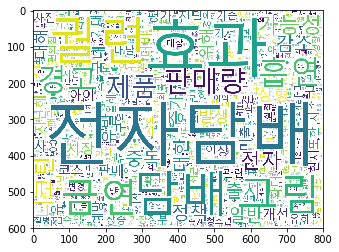

In [13]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')